In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Step 1: Load the CSV file
file_path = 'Baoan_Weather_1998_2022.csv'
weather_data = pd.read_csv(file_path, low_memory=False)

# Step 2: Select relevant columns
relevant_columns = ['DATE', 'TMP']
weather_data = weather_data[relevant_columns]

# Step 3: Clean the data
# Define a function to clean the TMP column
def clean_tmp_value(value):
    # Remove non-numeric characters except for '.' and '-'
    cleaned_value = re.sub(r'[^\d.-]', '', value)
    try:
        # Try to convert to float
        return float(cleaned_value)
    except ValueError:
        # If conversion fails, return NaN
        return None

# Apply the cleaning function to the TMP column
weather_data['TMP'] = weather_data['TMP'].apply(clean_tmp_value)

# Drop rows with missing values
weather_data.dropna(inplace=True)

# Ensure TMP column is float
weather_data['TMP'] = weather_data['TMP'].astype(float)

# Verify the data type of TMP column
print(f"Data type of TMP column: {weather_data['TMP'].dtype}")

# Convert DATE to datetime using ISO8601 format
weather_data['datetime'] = pd.to_datetime(weather_data['DATE'], format='ISO8601')

# Set datetime as the index
weather_data.set_index('datetime', inplace=True)

# Step 4: Calculate monthly average temperature using agg method
monthly_avg_temp = weather_data.resample('ME').agg({'TMP': 'mean'})

# Step 5: Plot the monthly averaged air temperature against observation time
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp['TMP'], marker='o')
plt.title('Monthly Averaged Air Temperature in Shenzhen Baoan International Airport over 25 Years')
plt.xlabel('Observation Time')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for trends
print("Trend Analysis:")
if monthly_avg_temp['TMP'].is_monotonic_increasing:
    print("There is a clear increasing trend.")
elif monthly_avg_temp['TMP'].is_monotonic_decreasing:
    print("There is a clear decreasing trend.")
else:
    print("There is no clear trend.")

FileNotFoundError: [Errno 2] No such file or directory: 'Baoan_Weather_1998_2022.csv'

In [2]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
#3.1
import pandas as pd

# Load the dataset
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)

# Group by SID and get the maximum WMO_WIND for each storm
grouped = df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).reset_index()

# Sort by WMO_WIND in descending order and get the top 10
top_10_hurricanes = grouped.sort_values(by='WMO_WIND', ascending=False).head(10)

print(top_10_hurricanes)

                 SID            NAME WMO_WIND
11015  1997125S08079          RHONDA       95
11909  2005237N14148           TALIM       95
11865  2005054S09173           PERCY       95
11867  2005063S12141          INGRID       95
11872  2005092S11102  ADELINE:JULIET       95
11877  2005148N06156           NESAT       95
11887  2005192N11318           EMILY       95
11888  2005192N22155         HAITANG       95
11905  2005230N20144           MAWAR       95
11908  2005236N23285         KATRINA       95


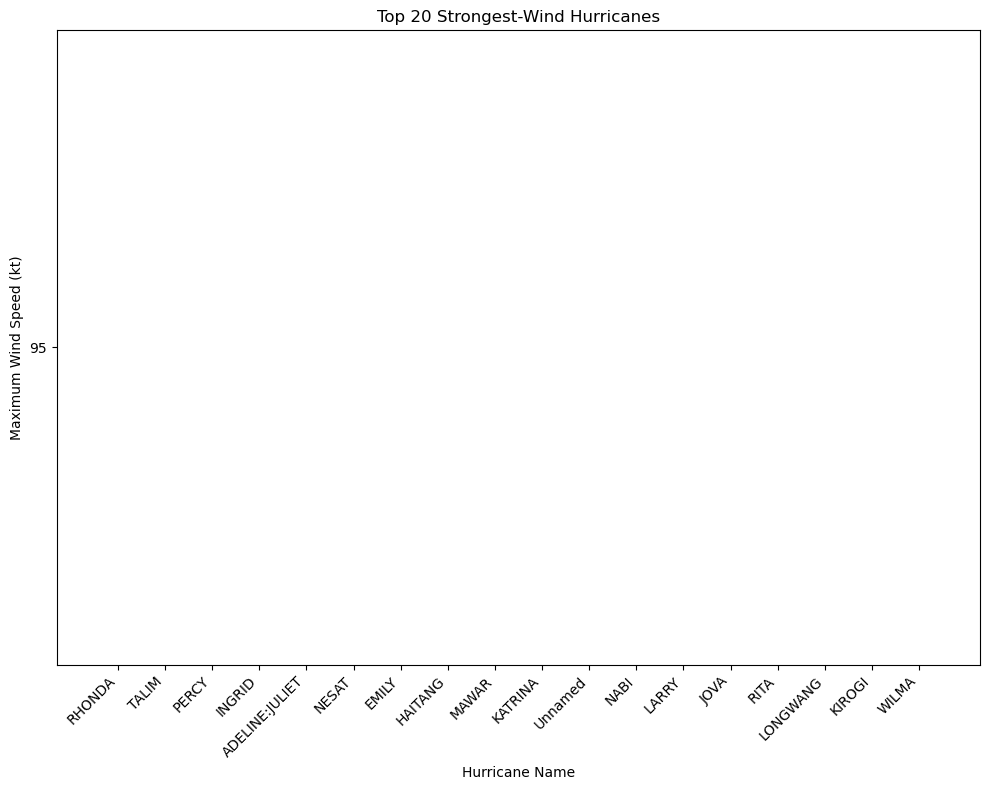

In [27]:
#3.2
import matplotlib.pyplot as plt

# Get the top 20 hurricanes
top_20_hurricanes = grouped.sort_values(by='WMO_WIND', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'], color='skyblue')
plt.xlabel('Hurricane Name')
plt.ylabel('Maximum Wind Speed (kt)')
plt.title('Top 20 Strongest-Wind Hurricanes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

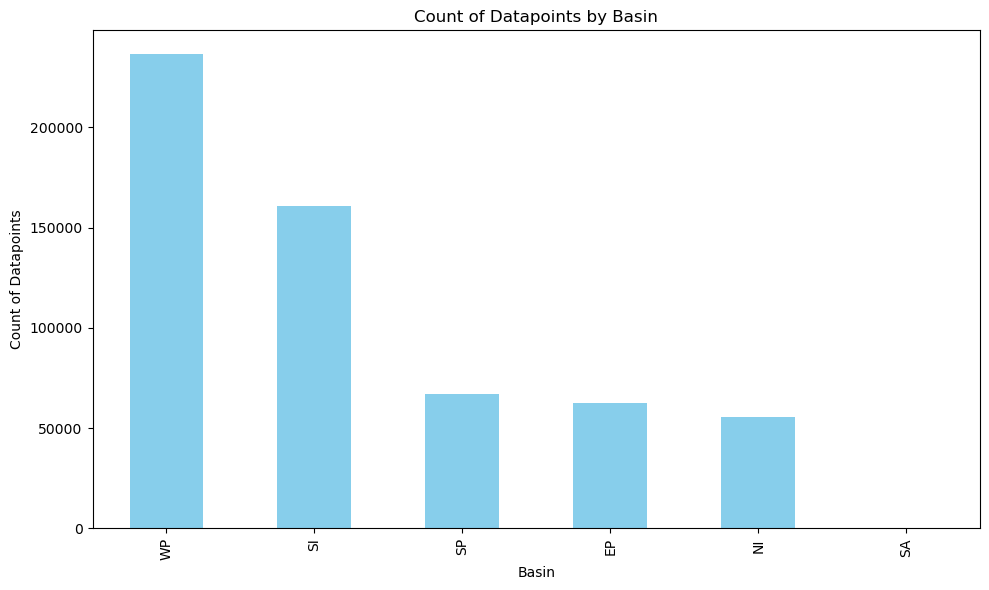

In [29]:
#3.3
# Count the number of datapoints by Basin
basin_counts = df['BASIN'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Basin')
plt.ylabel('Count of Datapoints')
plt.title('Count of Datapoints by Basin')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

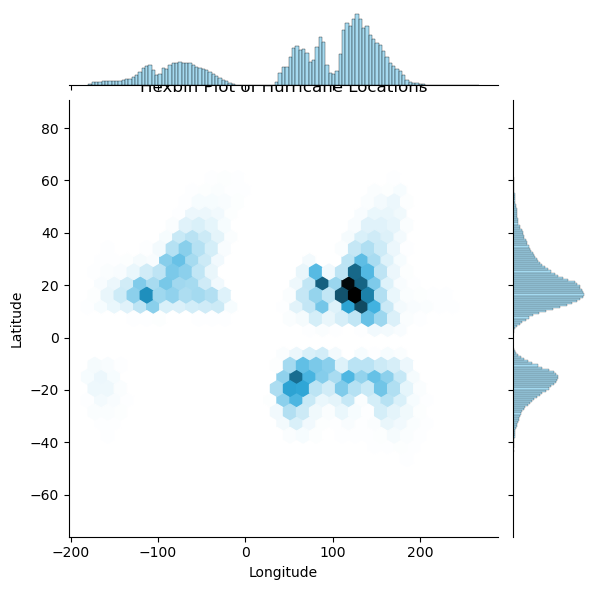

In [31]:
#3.4
import seaborn as sns

# Create a hexbin plot
plt.figure(figsize=(12, 8))
sns.jointplot(x=df['LON'], y=df['LAT'], kind='hex', gridsize=30, color='skyblue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Hurricane Locations')
plt.show()

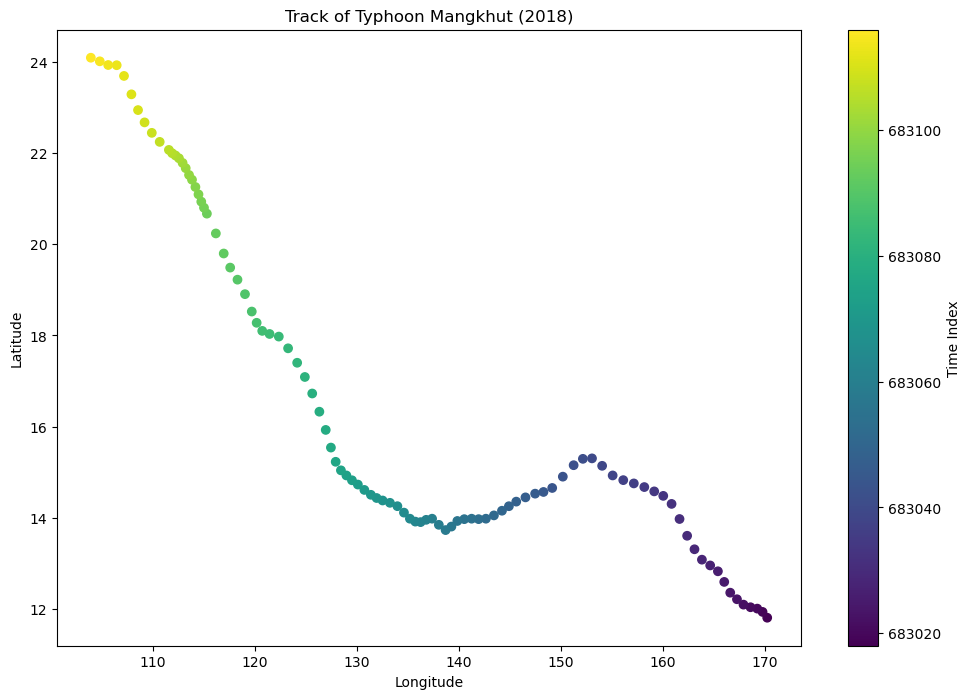

In [33]:
#3.5
# Filter the data for Typhoon Mangkhut in 2018
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)]

# Plot the track
plt.figure(figsize=(12, 8))
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c=mangkhut.index, cmap='viridis')
plt.colorbar(label='Time Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.show()

In [37]:
#3.6
# Filter the data
filtered_df = df[(df['BASIN'].isin(['WP', 'EP'])) & (df['SEASON'] >= 1970)]

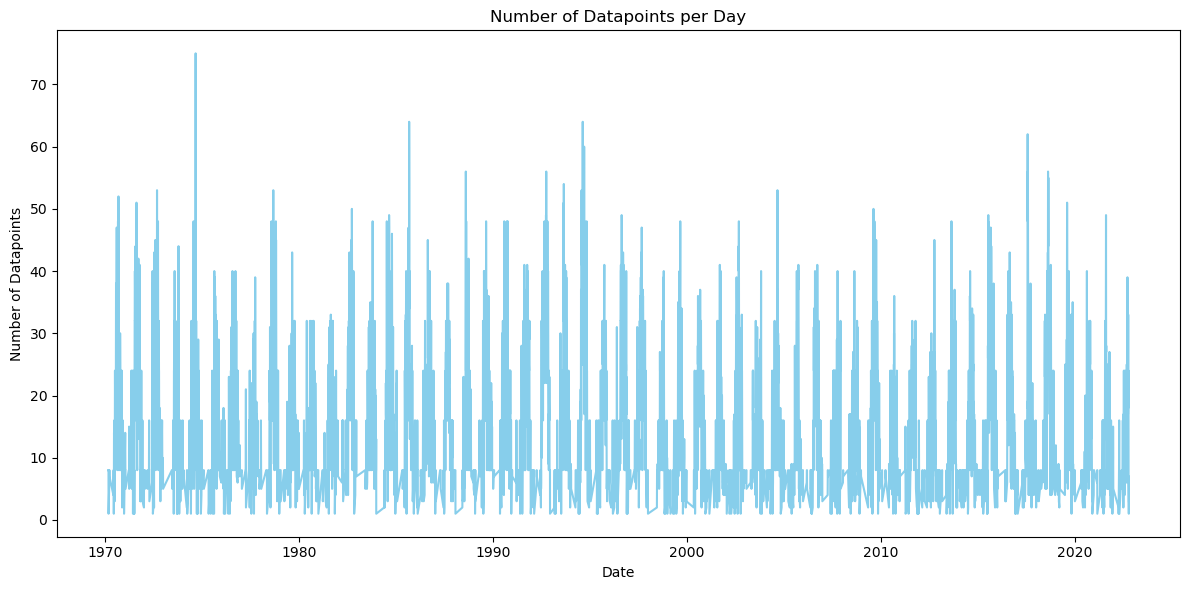

In [39]:
#3.7
# Group by date and count the number of datapoints
daily_counts = filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

# Plot the number of datapoints per day
plt.figure(figsize=(12, 6))
daily_counts.plot(color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints per Day')
plt.tight_layout()
plt.show()

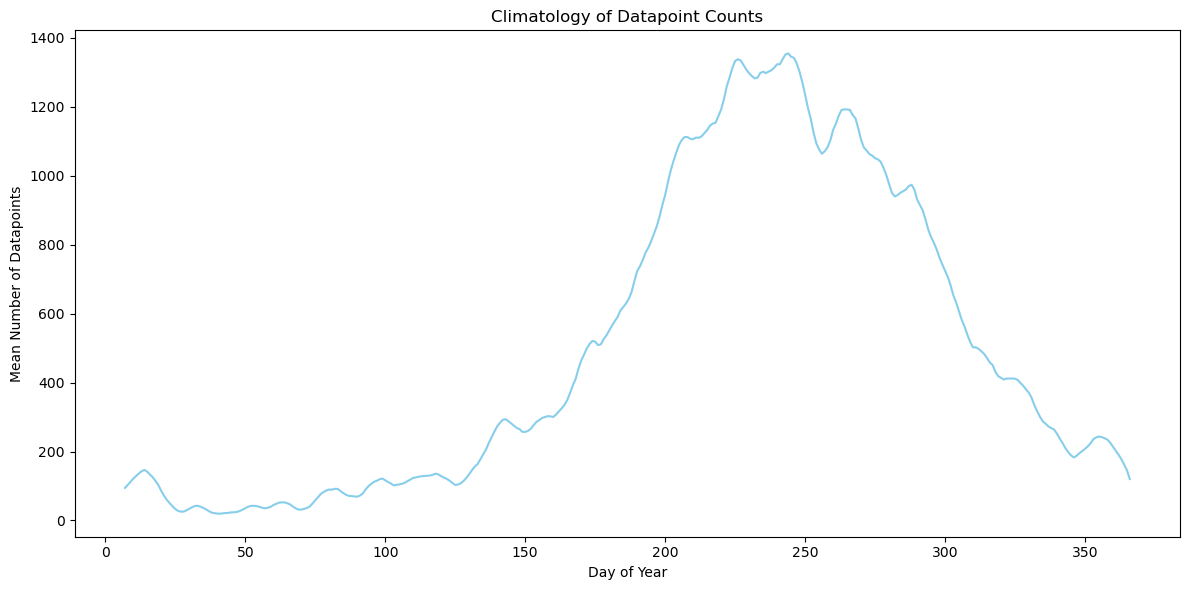

In [53]:
#3.8
# Extract the day of the year using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# Group by day of the year and calculate the mean count
climatology = filtered_df.groupby('DAY_OF_YEAR').size().rolling(window=7).mean()

# Plot the climatology
plt.figure(figsize=(12, 6))
climatology.plot(color='skyblue')
plt.xlabel('Day of Year')
plt.ylabel('Mean Number of Datapoints')
plt.title('Climatology of Datapoint Counts')
plt.tight_layout()
plt.show()

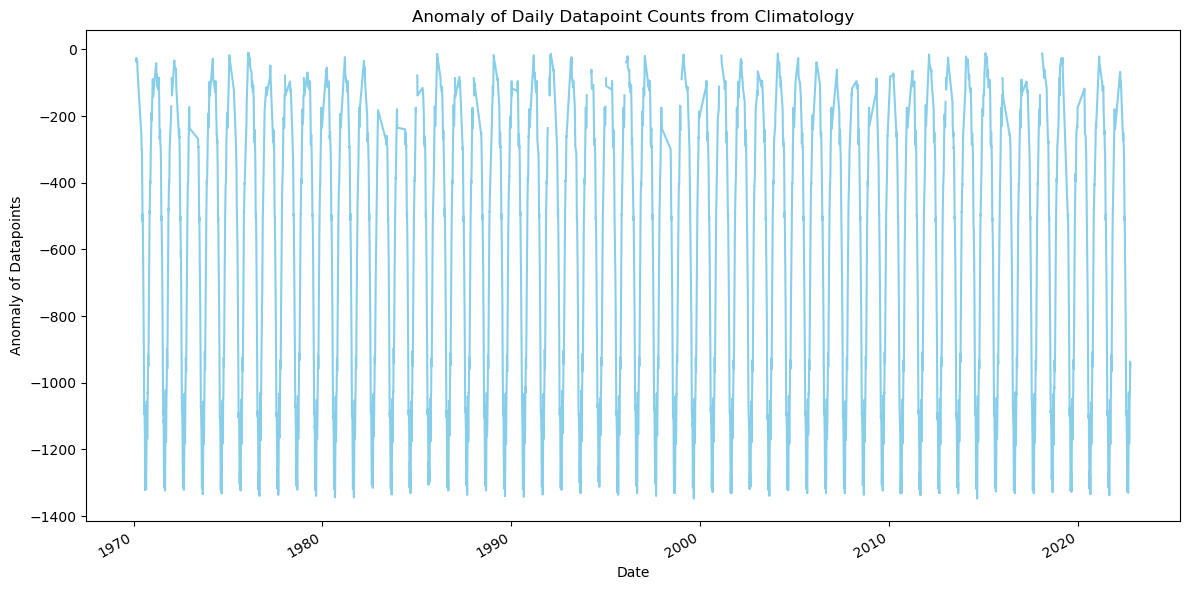

Years with significant anomalies:
ISO_TIME
1970-12-31   -150795.857143
1971-12-31   -155094.285714
1972-12-31   -150061.714286
1973-12-31   -136207.714286
1974-12-31   -150996.285714
1975-12-31   -136032.571429
1976-12-31   -138872.142857
1977-12-31   -146069.142857
1978-12-31   -149642.000000
1979-12-31   -153204.571429
1980-12-31   -149160.000000
1981-12-31   -149107.714286
1982-12-31   -146224.857143
1983-12-31   -151641.142857
1984-12-31   -153405.142857
1985-12-31   -146451.428571
1986-12-31   -153736.857143
1987-12-31   -147546.714286
1988-12-31   -144662.857143
1989-12-31   -155017.571429
1990-12-31   -159346.000000
1991-12-31   -151718.000000
1992-12-31   -148466.000000
1993-12-31   -158378.142857
1994-12-31   -148664.000000
1995-12-31   -143532.285714
1996-12-31   -153105.857143
1997-12-31   -157749.714286
1998-12-31   -139692.428571
1999-12-31   -130342.857143
2000-12-31   -139627.714286
2001-12-31   -145703.142857
2002-12-31   -145670.857143
2003-12-31   -146151.000000
2004-

In [59]:
#3.9
# Group by date and count the number of datapoints
daily_counts = filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

# Convert daily_counts to a DataFrame and ensure the index is a DatetimeIndex
daily_counts = daily_counts.to_frame(name='count')
daily_counts.index = pd.to_datetime(daily_counts.index)

# Extract the day of the year from the index
daily_counts.loc[:, 'DAY_OF_YEAR'] = daily_counts.index.dayofyear

# Merge the daily counts with the climatology
anomaly = daily_counts['count'] - climatology[daily_counts['DAY_OF_YEAR']].values

# Plot the anomaly
plt.figure(figsize=(12, 6))
anomaly.plot(color='skyblue')
plt.xlabel('Date')
plt.ylabel('Anomaly of Datapoints')
plt.title('Anomaly of Daily Datapoint Counts from Climatology')
plt.tight_layout()
plt.show()

# Identify years with significant anomalies
significant_years = anomaly.resample('YE').sum()
print("Years with significant anomalies:")
print(significant_years[significant_years.abs() > 100])

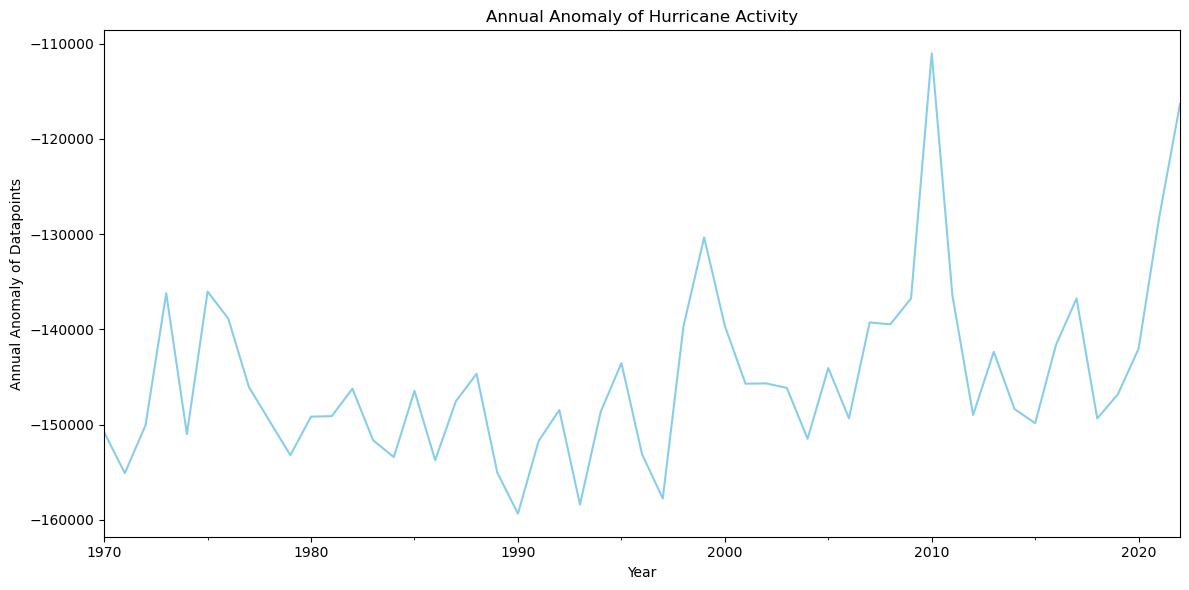

Years with significant anomalies:
ISO_TIME
1970-12-31   -150795.857143
1971-12-31   -155094.285714
1972-12-31   -150061.714286
1973-12-31   -136207.714286
1974-12-31   -150996.285714
1975-12-31   -136032.571429
1976-12-31   -138872.142857
1977-12-31   -146069.142857
1978-12-31   -149642.000000
1979-12-31   -153204.571429
1980-12-31   -149160.000000
1981-12-31   -149107.714286
1982-12-31   -146224.857143
1983-12-31   -151641.142857
1984-12-31   -153405.142857
1985-12-31   -146451.428571
1986-12-31   -153736.857143
1987-12-31   -147546.714286
1988-12-31   -144662.857143
1989-12-31   -155017.571429
1990-12-31   -159346.000000
1991-12-31   -151718.000000
1992-12-31   -148466.000000
1993-12-31   -158378.142857
1994-12-31   -148664.000000
1995-12-31   -143532.285714
1996-12-31   -153105.857143
1997-12-31   -157749.714286
1998-12-31   -139692.428571
1999-12-31   -130342.857143
2000-12-31   -139627.714286
2001-12-31   -145703.142857
2002-12-31   -145670.857143
2003-12-31   -146151.000000
2004-

In [63]:
#3.10
# Resample the anomaly to annual resolution
annual_anomaly = anomaly.resample('YE').sum()

# Plot the annual anomaly
plt.figure(figsize=(12, 6))
annual_anomaly.plot(color='skyblue')
plt.xlabel('Year')
plt.ylabel('Annual Anomaly of Datapoints')
plt.title('Annual Anomaly of Hurricane Activity')
plt.tight_layout()
plt.show()

# Identify years with significant anomalies
significant_years = annual_anomaly[annual_anomaly.abs() > 100]
print("Years with significant anomalies:")
print(significant_years)